# 1. Support Vector Machines
## 1.1. Support Vector Machines
In this section, we will try different regularization power using linear kernel SVM.

In [101]:
using MAT
using Gadfly
using ScikitLearn
using ScikitLearn.Utils: meshgrid
using DataFrames
@sk_import svm: SVC

PyObject <class 'sklearn.svm.classes.SVC'>

In [6]:
data_1 = matread("./data/ex6data1.mat")
data_2 = matread("./data/ex6data2.mat")
data_3 = matread("./data/ex6data3.mat")

Dict{String,Any} with 4 entries:
  "X"    => [-0.158986 0.423977; -0.347926 0.47076; … ; -0.294124 -0.134795; -0…
  "yval" => [0.0; 1.0; … ; 0.0; 0.0]
  "Xval" => [-0.353062 -0.673902; -0.227126 0.44732; … ; 0.248682 -0.497502; -0…
  "y"    => [1.0; 1.0; … ; 0.0; 0.0]

In [51]:
data1_df = DataFrame(x1=data_1["X"][:,1],
                     x2=data_1["X"][:,2],
                     label=data_1["y"][:,1])
# data1_df[:label] = map(x -> convert(Int64, x), data1_df[:label])
head(data1_df)

,x1,x2,label
1,1.9643,4.5957,1.0
2,2.2753,3.8589,1.0
3,2.9781,4.5651,1.0
4,2.932,3.5519,1.0
5,3.5772,2.856,1.0
6,4.015,3.1937,1.0


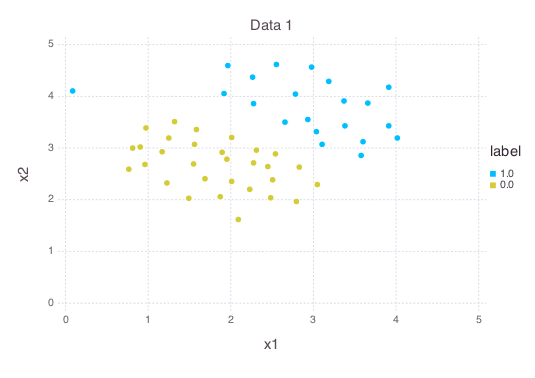

In [56]:
plot(data1_df, x=:x1, y=:x2, Geom.point, color=:label,
     Scale.color_discrete(), Guide.title("Data 1"))

Then we can try to run SVM, and see what the decision boundry will be.

In [148]:
model = SVC(kernel="linear", C=1.0)
model = ScikitLearn.fit!(model, data_1["X"], data_1["y"][:,1])

PyObject SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

I have tried `LIBSVM.jl`, `KSVM.jl`, `ScikitLearn.jl`. It seems only `ScikitLearn.jl` gave an interace to plot the decision boundary.

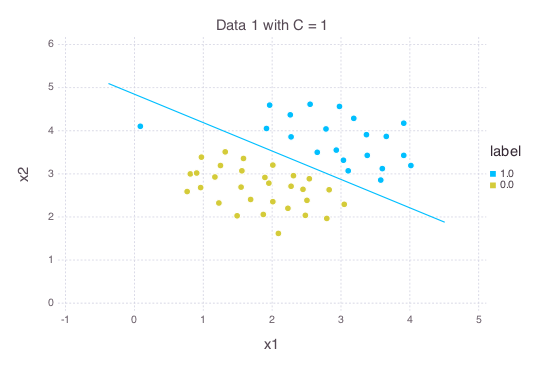

In [159]:
h=0.02
x_min, x_max = minimum(data_1["X"][:, 1]) - .5, maximum(data_1["X"][:, 1]) + .5
y_min, y_max = minimum(data_1["X"][:, 2]) - .5, maximum(data_1["X"][:, 2]) + .5
xx, yy = meshgrid(x_min:h:x_max, y_min:h:y_max)

z = decision_function(model, hcat(xx[:], yy[:]))
z = reshape(z, size(xx)...)

plot(layer(data1_df, x=:x1, y=:x2, Geom.point, color=:label),
     layer(z=z', x=x_min:h:x_max, y=y_min:h:y_max, Geom.contour(levels = [0.0])),
     Scale.color_discrete(), Guide.title("Data 1 with C = 1"))

Then we can try `c = 100`.

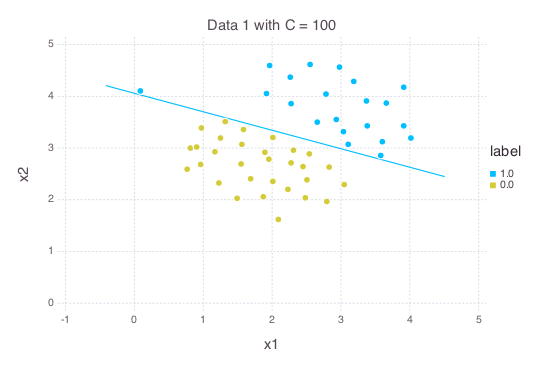

In [160]:
model = SVC(kernel="linear", C=100.0)
model = ScikitLearn.fit!(model, data_1["X"], data_1["y"][:,1])

x_min, x_max = minimum(data_1["X"][:, 1]) - .5, maximum(data_1["X"][:, 1]) + .5
y_min, y_max = minimum(data_1["X"][:, 2]) - .5, maximum(data_1["X"][:, 2]) + .5
xx, yy = meshgrid(x_min:h:x_max, y_min:h:y_max)

z = decision_function(model, hcat(xx[:], yy[:]))
z = reshape(z, size(xx)...)

plot(layer(data1_df, x=:x1, y=:x2, Geom.point, color=:label),
     layer(z=z', x=x_min:h:x_max, y=y_min:h:y_max, Geom.contour(levels = [0.0])),
     Scale.color_discrete(), Guide.title("Data 1 with C = 100"))

The plot patterns are expected. Higher C means less regularization power, then the mondel tries to seperate as many points as possible. Smaller C then can avoid overfitting problem.

## 1.2. SVM with Gaussian Kernels
### 1.2.1. Gaussian Kernel
We will implement a gaussian kernel.

$$K_{\text{gaussian}}(x^{(i)}, x^{(j)}) = \exp\left(-\frac{\sum_{k=1}^n(x_k^{(i)} - x_k^{(j)})^2}{2\sigma^2}\right)$$

In [163]:
function gaussian_kernel{T1, T2<:Real}(x1::Array{T1}, x2::Array{T2}, sigma)
    return(exp(-1 * (sum((x1 .- x2) .^ 2)) / (2 * (sigma ^ 2))))
end

gaussian_kernel (generic function with 1 method)

In [165]:
x1 = [1 2 1]
x2 = [0 4 -1]
sigma = 2
gaussian_kernel(x1, x2, sigma)

0.32465246735834974

### 1.2.2. Example Dataset 2
Then we can try gaussian kernel with SVM to solve non-linear-seperatable problem.

In [169]:
data2_df = DataFrame(x1=data_2["X"][:,1],
                     x2=data_2["X"][:,2],
                     label=data_2["y"][:,1])
head(data1_df)

,x1,x2,label
1,1.9643,4.5957,1.0
2,2.2753,3.8589,1.0
3,2.9781,4.5651,1.0
4,2.932,3.5519,1.0
5,3.5772,2.856,1.0
6,4.015,3.1937,1.0


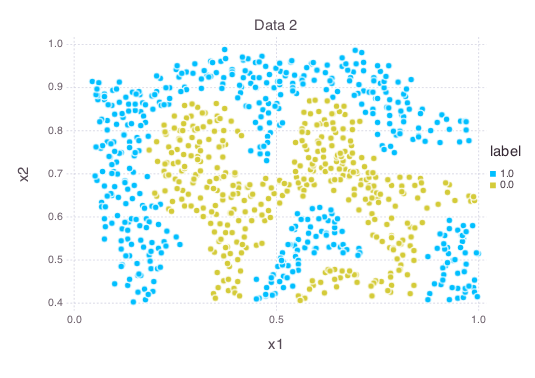

In [170]:
plot(data2_df, x=:x1, y=:x2, color=:label,
     Scale.color_discrete(), Guide.title("Data 2"))

In [174]:
model = SVC(kernel=(x1, x2) -> gaussian_kernel(x1, x2, 0.1), C=1.0)
model = ScikitLearn.fit!(model, data_2["X"], data_2["y"][:,1])

x_min, x_max = minimum(data_2["X"][:, 1]) - .5, maximum(data_2["X"][:, 1]) + .5
y_min, y_max = minimum(data_2["X"][:, 2]) - .5, maximum(data_2["X"][:, 2]) + .5
xx, yy = meshgrid(x_min:h:x_max, y_min:h:y_max)

z = decision_function(model, hcat(xx[:], yy[:]))
z = reshape(z, size(xx)...)

plot(layer(data2_df, x=:x1, y=:x2, Geom.point, color=:label),
     layer(z=z', x=x_min:h:x_max, y=y_min:h:y_max, Geom.contour(levels = [0.0])),
     Scale.color_discrete(), Guide.title("Data 2 with C = 1"))

LoadError: PyError (:PyObject_Call) <type 'exceptions.IndexError'>
IndexError('tuple index out of range',)
  File "/Users/JayWong/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/sklearn/svm/base.py", line 189, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/JayWong/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/sklearn/svm/base.py", line 230, in _dense_fit
    if X.shape[0] != X.shape[1]:


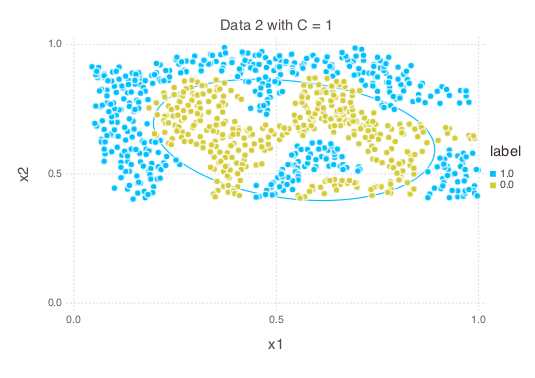

In [186]:
model = SVC(kernel="rbf", C=100.0)
model = ScikitLearn.fit!(model, data_2["X"], data_2["y"][:,1])

x_min, x_max = minimum(data_2["X"][:, 1]) - .5, maximum(data_2["X"][:, 1]) + .5
y_min, y_max = minimum(data_2["X"][:, 2]) - .5, maximum(data_2["X"][:, 2]) + .5
xx, yy = meshgrid(x_min:h:x_max, y_min:h:y_max)

z = decision_function(model, hcat(xx[:], yy[:]))
z = reshape(z, size(xx)...)

plot(layer(data2_df, x=:x1, y=:x2, Geom.point, color=:label),
     layer(z=z', x=x_min:h:x_max, y=y_min:h:y_max, Geom.contour(levels = [0.0])),
     Scale.color_discrete(), Guide.title("Data 2 with C = 1"))

In [175]:
gaussian_kernel(data_2["X"][:,1], data_2["X"][:,2], 0.1)

0.0

In [180]:
exp(-1 * sum((data_2["X"][:,1] .- data_2["X"][:,2]) .^ 2) / (2 * (0.1 ^ 2)))

0.0

In [178]:
(data_2["X"][:,1])

863-element Array{Float64,1}:
 0.107143 
 0.093318 
 0.0979263
 0.15553  
 0.210829 
 0.328341 
 0.429724 
 0.620968 
 0.756912 
 0.819124 
 0.809908 
 0.75     
 0.773041 
 ⋮        
 0.91129  
 0.890553 
 0.874424 
 0.897465 
 0.913594 
 0.968894 
 0.985023 
 0.99424  
 0.964286 
 0.975806 
 0.989631 
 0.996544 

In [ ]:
exp(-1 * (sum((x1 .- x2) .^ 2)) / (2 * (sigma ^ 2)))